# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries

import pandas as pd
import numpy as np 


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from model_runs import ModelRun

pd.set_option('display.max_columns', 300)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_file = 'data/classification_lab_data.csv'
df = pd.read_csv(data_file)
df.columns
NT = ModelRun(df)

### Build your attempt here

In [6]:
rd1 = {'target' : ['default payment next month'],
            'features' : [['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']],
            'scaler' : [StandardScaler, MinMaxScaler],
            'model' : [KNeighborsClassifier],
            'metrics' : [accuracy_score, f1_score],
            'kwargs' : [{'name':KNeighborsClassifier.__name__, 'n_neighbors':1}]
      }

# rd2 = {'target' : 'default payment next month',
#             'features' : ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'],
#             'scaler' : StandardScaler,
#             'model' : LogisticRegression,
#             'metrics' : [],
#             'kwargs' : {}}
NT.run_model(rd1)


KeyError: 'name'

ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

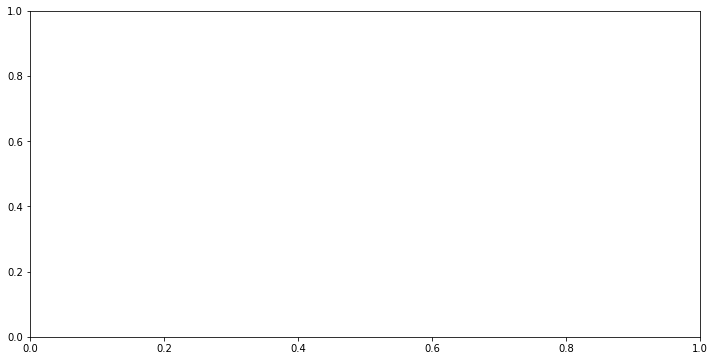

In [7]:
NT.get_results('accuracy_score')

## 1. Data Cleaning

In [ ]:
data_file = 'data/classification_lab_data.csv'

NT = LinearModeler()
NT.read_csv(data_file)

### Shape
* 23999 observations
* 24 features

### NaNs
* None

### .info()
`<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 24 columns):
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6                     23999 non-null int64
PAY_AMT1                      23999 non-null int64
PAY_AMT2                      23999 non-null int64
PAY_AMT3                      23999 non-null int64
PAY_AMT4                      23999 non-null int64
PAY_AMT5                      23999 non-null int64
PAY_AMT6                      23999 non-null int64
default payment next month    23999 non-null int64
dtypes: int64(24)
memory usage: 4.4 MB`

## 2. EDA

In [ ]:
NT.df.describe()

In [ ]:
NT.explore_data()

## 3. Feature Engineering

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [ ]:
TN.plot_restuls()

## 6. Model Evaluation

## 7. Final Model